# Investigate Menstrual data set

### Data source: Menstrual Health & Productivity Dataset
Link: https://www.kaggle.com/datasets/puspitachowdhury2/menstrual-health-dataset/data

Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy import stats
from scipy.stats import spearmanr
from scipy.stats import pearsonr

np.random.seed(42)

#%matplotlib inline

Load datasets and check for cleaniness

## Period Log Dataset

### Load and investigate data

In [2]:
period_log_df = pd.read_csv('Period_Log.csv')
period_log_df.head()

,user_id,cycle_number,start_date,cycle_length_days,prev_cycle_length,cycle_phase,flow_level,pain_level,pms_symptoms,mood_score,...,sleep_hours_cycle,energy_level,concentration_score,work_hours_lost,estrogen_pgml,progesterone_ngml,ovulation_result,overall_health_score,log_consistency_score,prepared_before_period
0,U00001,1,2024-02-13,33,NaN,Luteal,Heavy,9,Yes,6,...,5.3,6,7,5.1,84.7,4.14,Positive,6.5,0.949,0
1,U00001,2,2024-03-17,33,33.0,Follicular,Light,2,No,8,...,4.6,7,8,2.6,126.1,2.79,Negative,9.4,0.949,1
2,U00001,3,2024-04-19,34,33.0,Follicular,Heavy,8,No,5,...,5.1,5,5,6.8,131.1,1.70,Negative,6.7,0.949,1
3,U00001,4,2024-05-23,31,34.0,Luteal,Light,3,No,8,...,6.7,8,8,2.5,82.0,8.50,Negative,9.0,0.949,0
4,U00001,5,2024-06-23,31,31.0,Luteal,Moderate,3,No,9,...,5.8,9,8,2.4,55.5,6.30,Negative,9.3,0.949,1


In [3]:
period_log_df.shape

(17976, 21)

In [4]:
period_log_df.describe()

,cycle_number,cycle_length_days,prev_cycle_length,pain_level,mood_score,stress_score_cycle,sleep_hours_cycle,energy_level,concentration_score,work_hours_lost,estrogen_pgml,progesterone_ngml,overall_health_score,log_consistency_score,prepared_before_period
count,17976.000000,17976.000000,15976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,5.214842,27.816756,27.826865,4.854473,7.084947,5.749260,6.960253,6.832165,7.352025,3.394443,96.429840,5.336521,8.548665,0.935288,0.567701
std,2.931241,2.400329,2.399832,2.230292,1.506431,1.771953,1.315146,1.687533,1.435035,1.495181,27.928743,3.791151,1.106405,0.020129,0.495409
min,1.000000,22.000000,22.000000,1.000000,1.000000,1.000000,4.500000,1.000000,2.000000,0.000000,10.000000,0.100000,4.400000,0.860000,0.000000
25%,3.000000,26.000000,26.000000,3.000000,6.000000,4.500000,6.000000,6.000000,6.000000,2.300000,76.300000,2.230000,7.800000,0.921000,0.000000
50%,5.000000,28.000000,28.000000,5.000000,7.000000,5.800000,7.000000,7.000000,7.000000,3.400000,94.300000,3.830000,8.600000,0.936000,1.000000
75%,7.000000,29.000000,29.000000,6.000000,8.000000,7.000000,7.900000,8.000000,8.000000,4.400000,115.100000,8.370000,9.500000,0.950000,1.000000
max,12.000000,44.000000,44.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.800000,206.500000,20.250000,10.000000,0.985000,1.000000


In [5]:
period_log_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 17976 non-null  object 
 1   cycle_number            17976 non-null  int64  
 2   start_date              17976 non-null  object 
 3   cycle_length_days       17976 non-null  int64  
 4   prev_cycle_length       15976 non-null  float64
 5   cycle_phase             17976 non-null  object 
 6   flow_level              17976 non-null  object 
 7   pain_level              17976 non-null  int64  
 8   pms_symptoms            17976 non-null  object 
 9   mood_score              17976 non-null  int64  
 10  stress_score_cycle      17976 non-null  float64
 11  sleep_hours_cycle       17976 non-null  float64
 12  energy_level            17976 non-null  int64  
 13  concentration_score     17976 non-null  int64  
 14  work_hours_lost         17976 non-null

In [6]:
#convert start date column to date
period_log_df['start_date'] = pd.to_datetime(period_log_df['start_date'])
#confirm conversion
period_log_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_id                 17976 non-null  object        
 1   cycle_number            17976 non-null  int64         
 2   start_date              17976 non-null  datetime64[ns]
 3   cycle_length_days       17976 non-null  int64         
 4   prev_cycle_length       15976 non-null  float64       
 5   cycle_phase             17976 non-null  object        
 6   flow_level              17976 non-null  object        
 7   pain_level              17976 non-null  int64         
 8   pms_symptoms            17976 non-null  object        
 9   mood_score              17976 non-null  int64         
 10  stress_score_cycle      17976 non-null  float64       
 11  sleep_hours_cycle       17976 non-null  float64       
 12  energy_level            17976 non-null  int64 

In [7]:
#check for duplicates
duplicates = period_log_df[period_log_df.duplicated()]
duplicates

,user_id,cycle_number,start_date,cycle_length_days,prev_cycle_length,cycle_phase,flow_level,pain_level,pms_symptoms,mood_score,...,sleep_hours_cycle,energy_level,concentration_score,work_hours_lost,estrogen_pgml,progesterone_ngml,ovulation_result,overall_health_score,log_consistency_score,prepared_before_period


In [8]:
#count of null values by column
period_log_df.isnull().sum()

user_id                      0
cycle_number                 0
start_date                   0
cycle_length_days            0
prev_cycle_length         2000
cycle_phase                  0
flow_level                   0
pain_level                   0
pms_symptoms                 0
mood_score                   0
stress_score_cycle           0
sleep_hours_cycle            0
energy_level                 0
concentration_score          0
work_hours_lost              0
estrogen_pgml                0
progesterone_ngml            0
ovulation_result             0
overall_health_score         0
log_consistency_score        0
prepared_before_period       0
dtype: int64

In [9]:
filtered_period_log_df = period_log_df[period_log_df['prev_cycle_length'].isnull()]
filtered_period_log_df.head()

,user_id,cycle_number,start_date,cycle_length_days,prev_cycle_length,cycle_phase,flow_level,pain_level,pms_symptoms,mood_score,...,sleep_hours_cycle,energy_level,concentration_score,work_hours_lost,estrogen_pgml,progesterone_ngml,ovulation_result,overall_health_score,log_consistency_score,prepared_before_period
0,U00001,1,2024-02-13,33,NaN,Luteal,Heavy,9,Yes,6,...,5.3,6,7,5.1,84.7,4.14,Positive,6.5,0.949,0
11,U00002,1,2024-03-13,25,NaN,Follicular,Light,2,No,9,...,5.6,8,9,2.6,63.9,3.44,Positive,9.6,0.923,0
23,U00003,1,2024-03-15,26,NaN,Menstrual,Moderate,4,No,8,...,7.3,7,9,2.5,27.4,1.47,Negative,8.9,0.953,0
34,U00004,1,2024-02-01,28,NaN,Follicular,Light,3,No,9,...,7.1,6,8,2.7,107.6,1.20,Negative,9.5,0.946,0
45,U00005,1,2024-03-23,36,NaN,Follicular,Moderate,5,No,6,...,7.6,10,7,2.0,104.7,2.58,Negative,8.9,0.929,0


In [10]:
#check if any of that the rows with na prev cycle length has the cycle number of 1
filtered_period_log_df = filtered_period_log_df[filtered_period_log_df['cycle_number'] != 1]
filtered_period_log_df.head()

,user_id,cycle_number,start_date,cycle_length_days,prev_cycle_length,cycle_phase,flow_level,pain_level,pms_symptoms,mood_score,...,sleep_hours_cycle,energy_level,concentration_score,work_hours_lost,estrogen_pgml,progesterone_ngml,ovulation_result,overall_health_score,log_consistency_score,prepared_before_period


In [11]:
filtered_period_log_df.describe()

,cycle_number,start_date,cycle_length_days,prev_cycle_length,pain_level,mood_score,stress_score_cycle,sleep_hours_cycle,energy_level,concentration_score,work_hours_lost,estrogen_pgml,progesterone_ngml,overall_health_score,log_consistency_score,prepared_before_period
count,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Categorical

#### Cycle Phase

In [12]:
#identify values in column
cycle_phase = period_log_df[['cycle_phase']].copy()
group_cycle_phase = cycle_phase.groupby('cycle_phase').size()
group_cycle_phase.head()

cycle_phase
Follicular    8092
Luteal        8068
Menstrual     1816
dtype: int64

In [13]:
#no ordinal data
#one hot encode
period_log_df = pd.get_dummies(period_log_df, columns=['cycle_phase'], dtype=int)
period_log_df.head()

,user_id,cycle_number,start_date,cycle_length_days,prev_cycle_length,flow_level,pain_level,pms_symptoms,mood_score,stress_score_cycle,...,work_hours_lost,estrogen_pgml,progesterone_ngml,ovulation_result,overall_health_score,log_consistency_score,prepared_before_period,cycle_phase_Follicular,cycle_phase_Luteal,cycle_phase_Menstrual
0,U00001,1,2024-02-13,33,NaN,Heavy,9,Yes,6,5.4,...,5.1,84.7,4.14,Positive,6.5,0.949,0,0,1,0
1,U00001,2,2024-03-17,33,33.0,Light,2,No,8,3.7,...,2.6,126.1,2.79,Negative,9.4,0.949,1,1,0,0
2,U00001,3,2024-04-19,34,33.0,Heavy,8,No,5,5.7,...,6.8,131.1,1.70,Negative,6.7,0.949,1,1,0,0
3,U00001,4,2024-05-23,31,34.0,Light,3,No,8,5.2,...,2.5,82.0,8.50,Negative,9.0,0.949,0,0,1,0
4,U00001,5,2024-06-23,31,31.0,Moderate,3,No,9,3.7,...,2.4,55.5,6.30,Negative,9.3,0.949,1,0,1,0


#### Flow level

In [14]:
#identify values in column
flow_level = period_log_df[['flow_level']].copy()
group_flow_level = flow_level.groupby('flow_level').size()
group_flow_level.head()

flow_level
Heavy       2454
Light       6665
Moderate    8857
dtype: int64

In [15]:
#ordinal data
#create order for values
flow_level_order = {'Light': 0, 'Moderate': 1, 'Heavy': 2}
#map to identified order
period_log_df['flow_level'] = period_log_df['flow_level'].map(flow_level_order)
period_log_df.head()

,user_id,cycle_number,start_date,cycle_length_days,prev_cycle_length,flow_level,pain_level,pms_symptoms,mood_score,stress_score_cycle,...,work_hours_lost,estrogen_pgml,progesterone_ngml,ovulation_result,overall_health_score,log_consistency_score,prepared_before_period,cycle_phase_Follicular,cycle_phase_Luteal,cycle_phase_Menstrual
0,U00001,1,2024-02-13,33,NaN,2,9,Yes,6,5.4,...,5.1,84.7,4.14,Positive,6.5,0.949,0,0,1,0
1,U00001,2,2024-03-17,33,33.0,0,2,No,8,3.7,...,2.6,126.1,2.79,Negative,9.4,0.949,1,1,0,0
2,U00001,3,2024-04-19,34,33.0,2,8,No,5,5.7,...,6.8,131.1,1.70,Negative,6.7,0.949,1,1,0,0
3,U00001,4,2024-05-23,31,34.0,0,3,No,8,5.2,...,2.5,82.0,8.50,Negative,9.0,0.949,0,0,1,0
4,U00001,5,2024-06-23,31,31.0,1,3,No,9,3.7,...,2.4,55.5,6.30,Negative,9.3,0.949,1,0,1,0


#### PMS Symptoms

In [16]:
#identify values in column
pms_symptoms = period_log_df[['pms_symptoms']].copy()
group_pms_symptoms = pms_symptoms.groupby('pms_symptoms').size()
group_pms_symptoms.head()

pms_symptoms
No     12675
Yes     5301
dtype: int64

In [17]:
#convert PMS symptoms to numerical
period_log_df['pms_symptoms'] = period_log_df['pms_symptoms'].map({'Yes': 1, 'No': 0})
period_log_df.head()

,user_id,cycle_number,start_date,cycle_length_days,prev_cycle_length,flow_level,pain_level,pms_symptoms,mood_score,stress_score_cycle,...,work_hours_lost,estrogen_pgml,progesterone_ngml,ovulation_result,overall_health_score,log_consistency_score,prepared_before_period,cycle_phase_Follicular,cycle_phase_Luteal,cycle_phase_Menstrual
0,U00001,1,2024-02-13,33,NaN,2,9,1,6,5.4,...,5.1,84.7,4.14,Positive,6.5,0.949,0,0,1,0
1,U00001,2,2024-03-17,33,33.0,0,2,0,8,3.7,...,2.6,126.1,2.79,Negative,9.4,0.949,1,1,0,0
2,U00001,3,2024-04-19,34,33.0,2,8,0,5,5.7,...,6.8,131.1,1.70,Negative,6.7,0.949,1,1,0,0
3,U00001,4,2024-05-23,31,34.0,0,3,0,8,5.2,...,2.5,82.0,8.50,Negative,9.0,0.949,0,0,1,0
4,U00001,5,2024-06-23,31,31.0,1,3,0,9,3.7,...,2.4,55.5,6.30,Negative,9.3,0.949,1,0,1,0


#### Ovulation Result

In [18]:
#identify values in column
ovulation_result = period_log_df[['ovulation_result']].copy()
group_ovulation_result = ovulation_result.groupby('ovulation_result').size()
group_ovulation_result.head()

ovulation_result
Negative    8246
Positive    9730
dtype: int64

In [19]:
#convert ovulation result to numerical
period_log_df['x'] = period_log_df['ovulation_result'].map({'Positive': 1, 'Negative': 0})
period_log_df.head()

,user_id,cycle_number,start_date,cycle_length_days,prev_cycle_length,flow_level,pain_level,pms_symptoms,mood_score,stress_score_cycle,...,estrogen_pgml,progesterone_ngml,ovulation_result,overall_health_score,log_consistency_score,prepared_before_period,cycle_phase_Follicular,cycle_phase_Luteal,cycle_phase_Menstrual,x
0,U00001,1,2024-02-13,33,NaN,2,9,1,6,5.4,...,84.7,4.14,Positive,6.5,0.949,0,0,1,0,1
1,U00001,2,2024-03-17,33,33.0,0,2,0,8,3.7,...,126.1,2.79,Negative,9.4,0.949,1,1,0,0,0
2,U00001,3,2024-04-19,34,33.0,2,8,0,5,5.7,...,131.1,1.70,Negative,6.7,0.949,1,1,0,0,0
3,U00001,4,2024-05-23,31,34.0,0,3,0,8,5.2,...,82.0,8.50,Negative,9.0,0.949,0,0,1,0,0
4,U00001,5,2024-06-23,31,31.0,1,3,0,9,3.7,...,55.5,6.30,Negative,9.3,0.949,1,0,1,0,0


#### Cycle Number

In [20]:
#identify values in column
cycle_number = period_log_df[['cycle_number']].copy()
group_cycle_number = cycle_number.groupby('cycle_number').size()
group_cycle_number

cycle_number
1     2000
2     2000
3     2000
4     2000
5     2000
6     2000
7     1721
8     1431
9     1129
10     847
11     560
12     288
dtype: int64

## Testing against 1 cycle (2k rows)

In [21]:
period_log_df = period_log_df.query('cycle_number == 3')
period_log_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 2 to 17968
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   user_id                 2000 non-null   object        
 1   cycle_number            2000 non-null   int64         
 2   start_date              2000 non-null   datetime64[ns]
 3   cycle_length_days       2000 non-null   int64         
 4   prev_cycle_length       2000 non-null   float64       
 5   flow_level              2000 non-null   int64         
 6   pain_level              2000 non-null   int64         
 7   pms_symptoms            2000 non-null   int64         
 8   mood_score              2000 non-null   int64         
 9   stress_score_cycle      2000 non-null   float64       
 10  sleep_hours_cycle       2000 non-null   float64       
 11  energy_level            2000 non-null   int64         
 12  concentration_score     2000 non-null   int64       

### Stress

In [22]:
period_log_df.describe()

,cycle_number,start_date,cycle_length_days,prev_cycle_length,flow_level,pain_level,pms_symptoms,mood_score,stress_score_cycle,sleep_hours_cycle,...,work_hours_lost,estrogen_pgml,progesterone_ngml,overall_health_score,log_consistency_score,prepared_before_period,cycle_phase_Follicular,cycle_phase_Luteal,cycle_phase_Menstrual,x
count,2000.0,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.0,2024-04-08 07:30:00,27.783000,27.781500,0.767500,4.922000,0.292500,7.065500,5.78660,6.960050,...,3.430200,95.347700,5.392120,8.522550,0.935474,0.654000,0.429000,0.459500,0.111500,0.525000
min,3.0,2024-02-19 00:00:00,22.000000,22.000000,0.000000,1.000000,0.000000,2.000000,1.00000,4.500000,...,0.000000,23.700000,0.100000,4.400000,0.860000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.0,2024-03-15 00:00:00,26.000000,26.000000,0.000000,3.000000,0.000000,6.000000,4.50000,6.100000,...,2.400000,74.400000,2.180000,7.700000,0.921000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.0,2024-04-08 00:00:00,28.000000,28.000000,1.000000,5.000000,0.000000,7.000000,5.80000,7.000000,...,3.400000,93.250000,3.860000,8.600000,0.937000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,3.0,2024-05-01 06:00:00,29.000000,29.000000,1.000000,7.000000,1.000000,8.000000,7.10000,7.900000,...,4.500000,113.300000,8.362500,9.500000,0.951000,1.000000,1.000000,1.000000,0.000000,1.000000
max,3.0,2024-06-04 00:00:00,42.000000,40.000000,2.000000,10.000000,1.000000,10.000000,10.00000,10.000000,...,8.800000,197.500000,19.230000,10.000000,0.985000,1.000000,1.000000,1.000000,1.000000,1.000000
std,0.0,NaN,2.373126,2.354258,0.669827,2.243754,0.455024,1.540583,1.79523,1.302255,...,1.512667,28.483861,3.857293,1.126682,0.020575,0.475812,0.495057,0.498482,0.314829,0.499499


#### High Stress

In [23]:
#split the data for high stress (using the top 25%)
high_stress = period_log_df.query('stress_score_cycle >= 7.000000')
high_stress_mean = high_stress.mean(numeric_only=True)
high_stress_mean

cycle_number               3.000000
cycle_length_days         27.834254
prev_cycle_length         27.771639
flow_level                 0.801105
pain_level                 6.701657
pms_symptoms               0.386740
mood_score                 6.046041
stress_score_cycle         7.994843
sleep_hours_cycle          6.642173
energy_level               5.412523
concentration_score        6.071823
work_hours_lost            4.790055
estrogen_pgml             94.986188
progesterone_ngml          5.952339
overall_health_score       7.372744
log_consistency_score      0.935282
prepared_before_period     0.659300
cycle_phase_Follicular     0.366483
cycle_phase_Luteal         0.539595
cycle_phase_Menstrual      0.093923
x                          0.545120
dtype: float64

#### Low Stress

In [24]:
#split the data for low stress (using the bottom 25%)
low_stress = period_log_df.query('stress_score_cycle <= 4.500000')
low_stress_mean = low_stress.mean(numeric_only=True)
low_stress_mean

cycle_number               3.000000
cycle_length_days         27.715706
prev_cycle_length         27.866799
flow_level                 0.759443
pain_level                 3.145129
pms_symptoms               0.166998
mood_score                 8.192843
stress_score_cycle         3.473757
sleep_hours_cycle          7.298012
energy_level               8.172962
concentration_score        8.504970
work_hours_lost            2.009145
estrogen_pgml             95.038171
progesterone_ngml          4.740775
overall_health_score       9.599602
log_consistency_score      0.935487
prepared_before_period     0.666004
cycle_phase_Follicular     0.504970
cycle_phase_Luteal         0.365805
cycle_phase_Menstrual      0.129225
x                          0.512922
dtype: float64

#### Stress Differences

##### High vs Low Stress Diff

Difference in means for all columns in dataset

In [25]:
difference = high_stress_mean - low_stress_mean
difference

cycle_number              0.000000
cycle_length_days         0.118548
prev_cycle_length        -0.095160
flow_level                0.041662
pain_level                3.556528
pms_symptoms              0.219742
mood_score               -2.146802
stress_score_cycle        4.521086
sleep_hours_cycle        -0.655839
energy_level             -2.760439
concentration_score      -2.433147
work_hours_lost           2.780910
estrogen_pgml            -0.051983
progesterone_ngml         1.211564
overall_health_score     -2.226858
log_consistency_score    -0.000205
prepared_before_period   -0.006704
cycle_phase_Follicular   -0.138488
cycle_phase_Luteal        0.173790
cycle_phase_Menstrual    -0.035302
x                         0.032197
dtype: float64

Looking at the difference in means from high stress to low stress, we see that on average, the pain level and work hours lost is higher. Additionally, for high stress, we see a lower average mood score, energy level, concentration score, estrogen_pgml, and overall health score

#### confidence interval

What is the difference in the mean pain_level for those with high stress scores vs low stress scores?
Is there evidence of a difference in the average pain_level?

I will build a confidence interval for the diffence of average pain_level for those with high stress and low stress.

In [26]:
period_sample = period_log_df.sample(200)

In [27]:
h_stress = period_sample.query('stress_score_cycle >= 7.000000')
h_stress.stress_score_cycle.count()

np.int64(53)

In [28]:
h_stress_proportion = h_stress.stress_score_cycle.count()/period_sample.stress_score_cycle.count()
h_stress_proportion

np.float64(0.265)

In [29]:
l_stress = period_sample.query('stress_score_cycle <= 4.500000')
l_stress.stress_score_cycle.count()

np.int64(54)

In [30]:
l_stress_proportion = l_stress.stress_score_cycle.count()/period_sample.stress_score_cycle.count()
l_stress_proportion

np.float64(0.27)

In [31]:
h_stress.pain_level.mean()

np.float64(6.679245283018868)

In [32]:
l_stress.pain_level.mean()

np.float64(2.685185185185185)

In [33]:
period_sample.pain_level.mean()

np.float64(4.65)

In [34]:
period_log_df.pain_level.mean()

np.float64(4.922)

In [35]:
bootsamp = period_sample.sample(200, replace = True)

In [36]:
bootsamp['stress_score_cycle'].mean()

np.float64(5.672000000000001)

In [37]:
l_stress__pain_means, h_stress_pain_means, diffs, sample_means = [], [], [], []
for _ in range(10000):
    bootsamp = period_sample.sample(200, replace = True)
    h_stress_pain_mean = bootsamp[bootsamp['stress_score_cycle'] >= 7.000000]['pain_level'].mean()
    l_stress__pain_mean = bootsamp[bootsamp['stress_score_cycle'] <= 4.500000]['pain_level'].mean()
    #append the info
    l_stress__pain_means.append(l_stress__pain_mean)
    h_stress_pain_means.append(h_stress_pain_mean)
    diffs.append(h_stress_pain_mean - l_stress__pain_mean)
    sample_means.append(bootsamp.pain_level.mean())

In [38]:
low, high = np.percentile(diffs, 2.5), np.percentile(diffs, 97.5)
low, high

(np.float64(3.3061151693928195), np.float64(4.660049744897958))

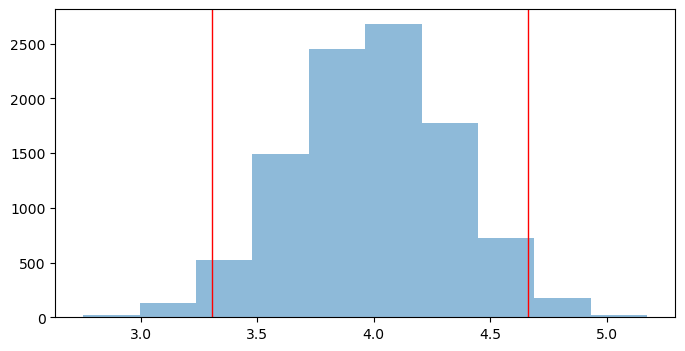

In [39]:
plt.figure(figsize=(8, 4))
plt.hist(diffs, alpha = 0.5);
plt.axvline(x=low, color='r', linewidth=1);
plt.axvline(x=high, color='r', linewidth=1);

The interval was built at a 95% confidence level, and since the difference did not contain zero, this suggests there is truly a difference in the average pain_level in the population of those with high stress scores as compared to those with low stress scores.

In [40]:
np.std(l_stress__pain_means)

np.float64(0.2310550603224647)

In [41]:
np.std(h_stress_pain_means)

np.float64(0.25357675994185647)

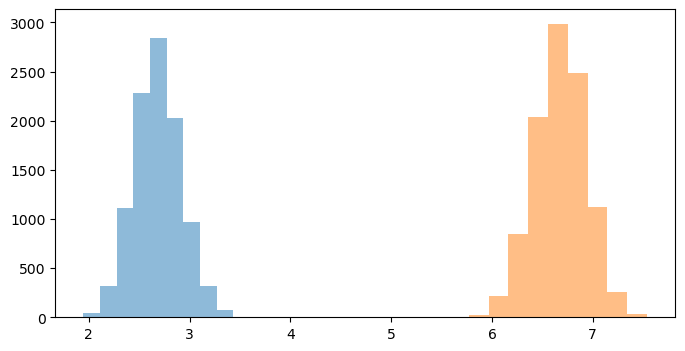

In [42]:
plt.figure(figsize=(8, 4))
plt.hist(l_stress__pain_means, alpha = 0.5);
plt.hist(h_stress_pain_means, alpha = 0.5); 

#### T-test

In [43]:
t_statistic, p_value = stats.ttest_ind(high_stress['pain_level'], low_stress['pain_level'])

In [44]:
t_statistic

np.float64(32.295222807736764)

In [45]:
p_value

np.float64(3.27833087857242e-159)

### Drop unnecessary columns

In [46]:
period_log_df = period_log_df.drop(['cycle_number', 'cycle_length_days', 'prev_cycle_length', 'sleep_hours_cycle', 'progesterone_ngml', 'log_consistency_score', 'prepared_before_period', 'start_date', 'flow_level', 'pms_symptoms', 'ovulation_result', 'cycle_phase_Follicular', 'cycle_phase_Luteal', 'cycle_phase_Menstrual'], axis=1)

In [47]:
period_log_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 2 to 17968
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               2000 non-null   object 
 1   pain_level            2000 non-null   int64  
 2   mood_score            2000 non-null   int64  
 3   stress_score_cycle    2000 non-null   float64
 4   energy_level          2000 non-null   int64  
 5   concentration_score   2000 non-null   int64  
 6   work_hours_lost       2000 non-null   float64
 7   estrogen_pgml         2000 non-null   float64
 8   overall_health_score  2000 non-null   float64
 9   x                     2000 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 171.9+ KB


In [48]:
period_log_df.describe()

,pain_level,mood_score,stress_score_cycle,energy_level,concentration_score,work_hours_lost,estrogen_pgml,overall_health_score,x
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.922000,7.065500,5.78660,6.762500,7.296000,3.430200,95.347700,8.522550,0.525000
std,2.243754,1.540583,1.79523,1.687162,1.456518,1.512667,28.483861,1.126682,0.499499
min,1.000000,2.000000,1.00000,1.000000,2.000000,0.000000,23.700000,4.400000,0.000000
25%,3.000000,6.000000,4.50000,6.000000,6.000000,2.400000,74.400000,7.700000,0.000000
50%,5.000000,7.000000,5.80000,7.000000,7.000000,3.400000,93.250000,8.600000,1.000000
75%,7.000000,8.000000,7.10000,8.000000,8.000000,4.500000,113.300000,9.500000,1.000000
max,10.000000,10.000000,10.00000,10.000000,10.000000,8.800000,197.500000,10.000000,1.000000


### Linear

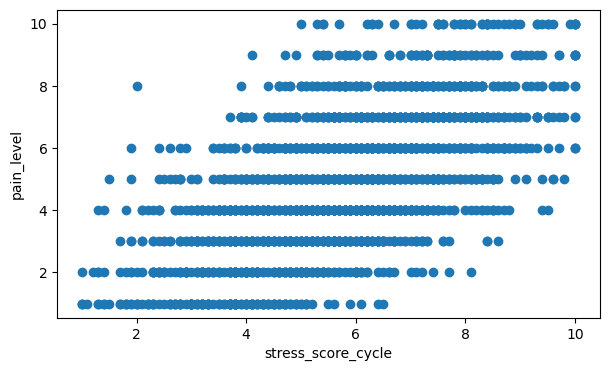

In [69]:
plt.figure(figsize=(7, 4))
plt.scatter(period_log_df['stress_score_cycle'], period_log_df['pain_level']);
plt.xlabel('stress_score_cycle');
plt.ylabel('pain_level');

In [50]:
correlation_coefficient, p_value = spearmanr(period_log_df['stress_score_cycle'], period_log_df['pain_level'])
print(f"Spearman's r: {correlation_coefficient}")
print(f"P-value: {p_value}")

Spearman's r: 0.6040161207217352
P-value: 3.576931573172372e-199


In [51]:
correlation_coefficient, p_value = pearsonr(period_log_df['stress_score_cycle'], period_log_df['pain_level'])
print(f"Pearson's r: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson's r: 0.6081916227455221
P-value: 1.2002723968096155e-202


In [52]:
period_log_df['intercept'] = 1

In [53]:
#from sklearn.linear_model import LinearRegression as lm

In [63]:
lm = sm.OLS(period_log_df['pain_level'], period_log_df[['intercept', 'stress_score_cycle']])
results_lm = lm.fit()
results_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pain_level   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     1173.
Date:                Wed, 03 Dec 2025   Prob (F-statistic):          1.20e-202
Time:                        21:29:05   Log-Likelihood:                -3991.8
No. Observations:                2000   AIC:                             7988.
Df Residuals:                    1998   BIC:                             7999.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept              0.5234      0.134      3.892      0.000       0.260       0.787
stress_score_cycle     0.7601      0.022     34.248      0.000       0.717       0.804
==============================================================================
Omnibus:                       37.857   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.638
Skew:                           0.298   Prob(JB):                     1.11e-08
Kurtosis:                       2.710   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
X = period_log_df[['intercept', 'stress_score_cycle']]
y = period_log_df[['pain_level']]

In [67]:
np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(),X)),X.transpose()),y)

array([[0.52335395],
       [0.76014344]])

### Multiple Linear

In [55]:
period_log_df['intercept'] = 1

In [56]:
mlr = sm.OLS(period_log_df['pain_level'], period_log_df[['intercept', 'stress_score_cycle', 'energy_level', 'estrogen_pgml', 'mood_score', 'overall_health_score', 'concentration_score']])
results_mlr = mlr.fit()
results_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pain_level   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     2793.
Date:                Wed, 03 Dec 2025   Prob (F-statistic):               0.00
Time:                        21:06:01   Log-Likelihood:                -2212.0
No. Observations:                2000   AIC:                             4438.
Df Residuals:                    1993   BIC:                             4477.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept               25.5680      0.270     94.566      0.000      25.038      26.098
stress_score_cycle      -0.3612      0.015    -24.732      0.000      -0.390      -0.333
energy_level            -0.1811      0.014    -12.574      0.000      -0.209      -0.153
estrogen_pgml            0.0011      0.001      1.852      0.064   -6.32e-05       0.002
mood_score              -0.1503      0.014    -10.662      0.000      -0.178      -0.123
overall_health_score    -1.7500      0.030    -58.041      0.000      -1.809      -1.691
concentration_score     -0.1996      0.017    -11.635      0.000      -0.233      -0.166
==============================================================================
Omnibus:                       17.617   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.993
Skew:                          -0.231   Prob(JB):                     0.000124
Kurtosis:                       2.953   Cond. No.                     1.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
X = period_log_df[['intercept', 'stress_score_cycle', 'energy_level', 'estrogen_pgml', 'mood_score', 'overall_health_score', 'concentration_score']]
y = period_log_df[['pain_level']]

In [58]:
np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(),X)),X.transpose()),y)

array([[ 2.55680018e+01],
       [-3.61213173e-01],
       [-1.81102258e-01],
       [ 1.06681691e-03],
       [-1.50267963e-01],
       [-1.75002410e+00],
       [-1.99620892e-01]])

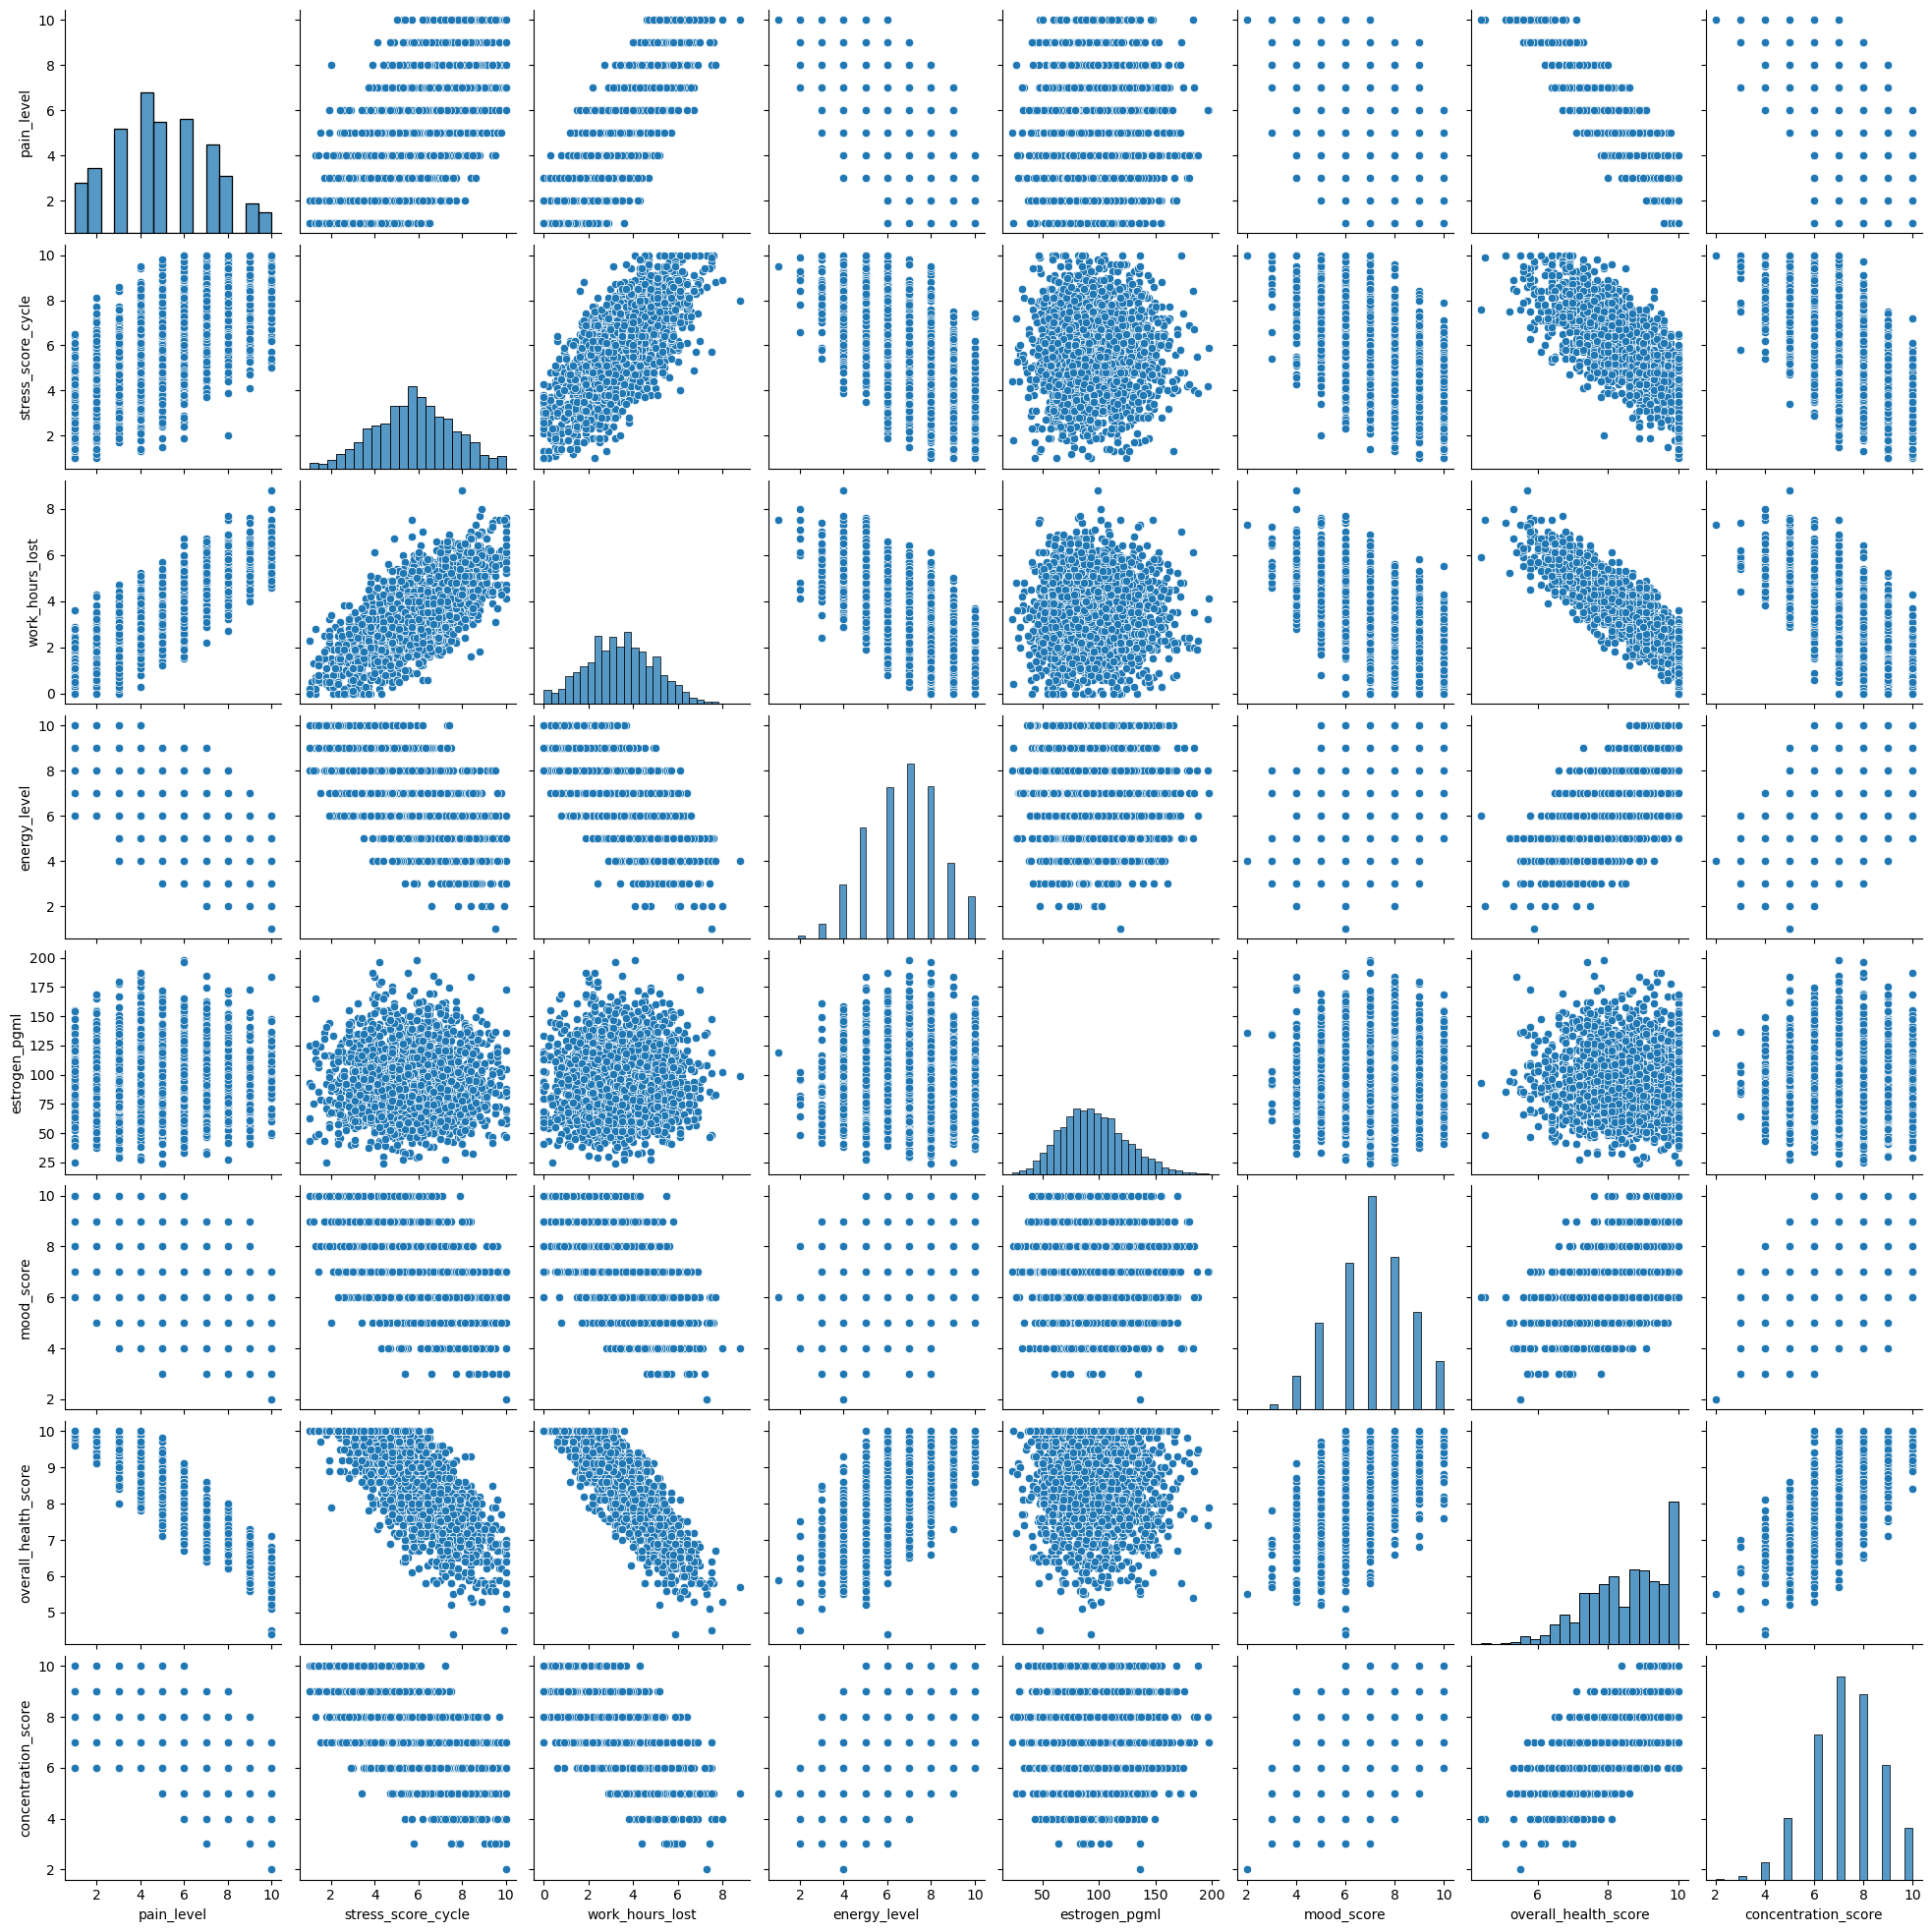

In [59]:
sns.pairplot(period_log_df[['pain_level', 'stress_score_cycle', 'work_hours_lost', 'energy_level', 'estrogen_pgml', 'mood_score', 'overall_health_score', 'concentration_score']]);
plt.show();

In [60]:
y, X = dmatrices('stress_score_cycle ~ pain_level + work_hours_lost + energy_level + estrogen_pgml + mood_score + overall_health_score + concentration_score', period_log_df, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 

In [61]:
vif

,VIF Factor,features
0,880.477026,Intercept
1,7.282055,pain_level
2,4.265137,work_hours_lost
3,2.231508,energy_level
4,1.004980,estrogen_pgml
5,1.790010,mood_score
6,9.398980,overall_health_score
7,2.336196,concentration_score
